## Machine learning with PyCaret (4 quadrants)

### Import libraries, data and check it

In [ ]:
import sklearn.metrics
import pandas as pd
import os

# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"
# os.environ["NUMEXPR_NUM_THREADS"] = "1"
# os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

RANDOM_SEED = 44

df = pd.read_parquet("") # inut data here
df.head()

,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,EKG,light,EDA,HR,trigger,...,pupil_diameter_skewness,pupil_diameter_kurtosis,pupil_position_x_mean,pupil_position_x_variance,pupil_position_x_skewness,pupil_position_x_kurtosis,pupil_position_y_mean,pupil_position_y_variance,pupil_position_y_skewness,pupil_position_y_kurtosis
0,1,0.808747,0.694369,0.328888,31.220381,-0.940237,1.282507,2.002761,0.776377,41031.0,...,NaN,NaN,0.694369,NaN,NaN,NaN,0.328888,NaN,NaN,NaN
1,0,1.000000,0.558652,0.443728,30.010603,-0.940237,1.282507,2.002761,0.776377,41031.0,...,NaN,NaN,0.626511,0.009210,NaN,NaN,0.386308,0.006594,NaN,NaN
2,1,0.817560,0.692349,0.330379,31.113964,-0.940237,1.282507,2.002761,0.776377,41031.0,...,-1.683003,NaN,0.648457,0.006050,-1.730736,NaN,0.367665,0.004340,1.731054,NaN
3,0,0.982916,0.557985,0.443735,30.377815,-0.940237,1.282507,2.002761,0.776377,41031.0,...,-0.303215,-3.976493,0.625839,0.006079,0.000518,-5.996276,0.386683,0.004340,-0.000443,-5.997441
4,1,0.823933,0.692471,0.329175,31.204803,-0.940237,1.282507,2.002761,0.776377,41031.0,...,-0.825396,-1.926928,0.639165,0.005447,-0.608088,-3.332261,0.375181,0.003916,0.608217,-3.332808


In [ ]:
df.columns

Index(['eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter', 'EKG',
       'light', 'EDA', 'HR', 'trigger', 'valence_rating', 'arousal_rating',
       'duration', 'norm_pos_x_fixation', 'norm_pos_y_fixation', 'dispersion',
       'confidence_fixation', 'user_id', 'categorised_rating',
       'fixation_count', 'fixation_duration_mean',
       'fixation_duration_variance', 'fixation_duration_skewness',
       'fixation_duration_kurtosis', 'fixation_dispersion_mean',
       'fixation_dispersion_variance', 'fixation_dispersion_skewness',
       'fixation_dispersion_kurtosis', 'fixation_position_x_mean',
       'fixation_position_x_variance', 'fixation_position_x_skewness',
       'fixation_position_x_kurtosis', 'fixation_position_y_mean',
       'fixation_position_y_variance', 'fixation_position_y_skewness',
       'fixation_position_y_kurtosis', 'pupil_diameter_mean',
       'pupil_diameter_variance', 'pupil_diameter_skewness',
       'pupil_diameter_kurtosis', 'pupil_position_x

### Transcode string categories into numbers

In [ ]:
df['categorised_rating'].unique()

array(['HALV', 'HAHV', 'LAHV', 'LALV'], dtype=object)

In [ ]:
df['categorised_rating'].replace({'HALV': 0, 'HAHV': 1, 'LAHV': 2, 'LALV': 3}, inplace=True)

In [ ]:
df['categorised_rating'].unique()

array([0, 1, 2, 3], dtype=int64)

### Drop not important features

In [ ]:
# df.drop(['pupil_timestamp', 'start_timestamp', 'end_timestamp', 'trigger'], axis=1, inplace=True)
df.drop(['trigger', 'user_id'], axis=1, inplace=True)

In [ ]:
df.head()

,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,EKG,light,EDA,HR,valence_rating,...,pupil_diameter_skewness,pupil_diameter_kurtosis,pupil_position_x_mean,pupil_position_x_variance,pupil_position_x_skewness,pupil_position_x_kurtosis,pupil_position_y_mean,pupil_position_y_variance,pupil_position_y_skewness,pupil_position_y_kurtosis
0,1,0.808747,0.694369,0.328888,31.220381,-0.940237,1.282507,2.002761,0.776377,5.0,...,NaN,NaN,0.694369,NaN,NaN,NaN,0.328888,NaN,NaN,NaN
1,0,1.000000,0.558652,0.443728,30.010603,-0.940237,1.282507,2.002761,0.776377,5.0,...,NaN,NaN,0.626511,0.009210,NaN,NaN,0.386308,0.006594,NaN,NaN
2,1,0.817560,0.692349,0.330379,31.113964,-0.940237,1.282507,2.002761,0.776377,5.0,...,-1.683003,NaN,0.648457,0.006050,-1.730736,NaN,0.367665,0.004340,1.731054,NaN
3,0,0.982916,0.557985,0.443735,30.377815,-0.940237,1.282507,2.002761,0.776377,5.0,...,-0.303215,-3.976493,0.625839,0.006079,0.000518,-5.996276,0.386683,0.004340,-0.000443,-5.997441
4,1,0.823933,0.692471,0.329175,31.204803,-0.940237,1.282507,2.002761,0.776377,5.0,...,-0.825396,-1.926928,0.639165,0.005447,-0.608088,-3.332261,0.375181,0.003916,0.608217,-3.332808


### Drop rows without predicted value

In [ ]:
# drop records without trigger or valence or arousal values

df.dropna(subset=['valence_rating'], inplace=True)
df.dropna(subset=['arousal_rating'], inplace=True)

In [ ]:
df.head()

,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,EKG,light,EDA,HR,valence_rating,...,pupil_diameter_skewness,pupil_diameter_kurtosis,pupil_position_x_mean,pupil_position_x_variance,pupil_position_x_skewness,pupil_position_x_kurtosis,pupil_position_y_mean,pupil_position_y_variance,pupil_position_y_skewness,pupil_position_y_kurtosis
0,1,0.808747,0.694369,0.328888,31.220381,-0.940237,1.282507,2.002761,0.776377,5.0,...,NaN,NaN,0.694369,NaN,NaN,NaN,0.328888,NaN,NaN,NaN
1,0,1.000000,0.558652,0.443728,30.010603,-0.940237,1.282507,2.002761,0.776377,5.0,...,NaN,NaN,0.626511,0.009210,NaN,NaN,0.386308,0.006594,NaN,NaN
2,1,0.817560,0.692349,0.330379,31.113964,-0.940237,1.282507,2.002761,0.776377,5.0,...,-1.683003,NaN,0.648457,0.006050,-1.730736,NaN,0.367665,0.004340,1.731054,NaN
3,0,0.982916,0.557985,0.443735,30.377815,-0.940237,1.282507,2.002761,0.776377,5.0,...,-0.303215,-3.976493,0.625839,0.006079,0.000518,-5.996276,0.386683,0.004340,-0.000443,-5.997441
4,1,0.823933,0.692471,0.329175,31.204803,-0.940237,1.282507,2.002761,0.776377,5.0,...,-0.825396,-1.926928,0.639165,0.005447,-0.608088,-3.332261,0.375181,0.003916,0.608217,-3.332808


In [ ]:
df.shape

(18486687, 46)

In [ ]:
df.columns

Index(['eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter', 'EKG',
       'light', 'EDA', 'HR', 'valence_rating', 'arousal_rating', 'duration',
       'norm_pos_x_fixation', 'norm_pos_y_fixation', 'dispersion',
       'confidence_fixation', 'categorised_rating', 'fixation_count',
       'fixation_duration_mean', 'fixation_duration_variance',
       'fixation_duration_skewness', 'fixation_duration_kurtosis',
       'fixation_dispersion_mean', 'fixation_dispersion_variance',
       'fixation_dispersion_skewness', 'fixation_dispersion_kurtosis',
       'fixation_position_x_mean', 'fixation_position_x_variance',
       'fixation_position_x_skewness', 'fixation_position_x_kurtosis',
       'fixation_position_y_mean', 'fixation_position_y_variance',
       'fixation_position_y_skewness', 'fixation_position_y_kurtosis',
       'pupil_diameter_mean', 'pupil_diameter_variance',
       'pupil_diameter_skewness', 'pupil_diameter_kurtosis',
       'pupil_position_x_mean', 'pupil_positio

### Balance dataset

In [ ]:
print(df.loc[df['categorised_rating'] == 0, :].shape)
print(df.loc[df['categorised_rating'] == 1, :].shape)
print(df.loc[df['categorised_rating'] == 2, :].shape)
print(df.loc[df['categorised_rating'] == 3, :].shape)

(9890284, 46)
(2637269, 46)
(2659985, 46)
(3299149, 46)


In [ ]:
N = 2500000

In [ ]:
df = pd.concat([df.loc[df['categorised_rating'] == 0, :].sample(n=N), 
           df.loc[df['categorised_rating'] == 1, :].sample(n=N),
           df.loc[df['categorised_rating'] == 2, :].sample(n=N),
           df.loc[df['categorised_rating'] == 3, :].sample(n=N)], axis=0)

In [ ]:
df.shape

(10000000, 46)

### Divide data into train / test sets

In [ ]:
# pick valence and arousal as target variables
# y = df[['arousal_rating']] # regression
# y = df[['valence_rating']] # regresssion
y = df[['categorised_rating']]

# y = f(X, add_param_1, add_param_2, add_param_3, ..., add_param_n)

X = df
# X = df.drop(['valence_rating', 'arousal_rating'], axis=1)

# print shape of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (18486687, 47)
y shape: (18486687, 1)


In [ ]:
import sklearn.model_selection

# split data into train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)

# k-fold validation; k=10
# 9-> training and 1 fold for testing
# 10 (k) times

# choosing k% per participant

# print shapes of train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14789349, 47)
X_test shape: (3697338, 47)
y_train shape: (14789349, 1)
y_test shape: (3697338, 1)


### Perform Machine Learning (classification)
#### N = 250

In [ ]:
from pycaret.classification import *

dataset = df.drop(['valence_rating', 'arousal_rating'], axis=1) #.sample(frac=0.1)
s = setup(data = dataset, target = 'categorised_rating')

,Description,Value
0,Session id,7939
1,Target,categorised_rating
2,Target type,Multiclass
3,Original data shape,"(1000, 44)"
4,Transformed data shape,"(1000, 44)"
5,Transformed train set shape,"(700, 44)"
6,Transformed test set shape,"(300, 44)"
7,Numeric features,43
8,Rows with missing values,55.6%
9,Preprocess,True


In [ ]:
best = compare_models(n_select=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:58:19
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.3657,0.6159,0.3657,0.3663,0.3621,0.1544,0.1556,0.0540
gbc,Gradient Boosting Classifier,0.3586,0.6157,0.3586,0.3557,0.3535,0.1450,0.1460,0.3800
rf,Random Forest Classifier,0.3429,0.6084,0.3429,0.3427,0.3375,0.1233,0.1248,0.0570
lda,Linear Discriminant Analysis,0.3429,0.6015,0.3429,0.3435,0.3375,0.1240,0.1259,0.0060
ridge,Ridge Classifier,0.3329,0.0000,0.3329,0.3300,0.3263,0.1108,0.1119,0.0070
lightgbm,Light Gradient Boosting Machine,0.3329,0.6029,0.3329,0.3331,0.3304,0.1105,0.1111,0.5480
ada,Ada Boost Classifier,0.3171,0.5710,0.3171,0.3163,0.3128,0.0896,0.0903,0.0320
nb,Naive Bayes,0.3029,0.5604,0.3029,0.3026,0.2854,0.0699,0.0722,0.3760
lr,Logistic Regression,0.2857,0.5636,0.2857,0.2865,0.2816,0.0477,0.0484,0.5230
dt,Decision Tree Classifier,0.2814,0.5210,0.2814,0.2808,0.2762,0.0422,0.0429,0.3700


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
# print(best)

for b in best:
    print(b)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7939, verbose=0, warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=7939, subsample=1.0, tol=0.0001,
 

In [ ]:
evaluate_model(best[3])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

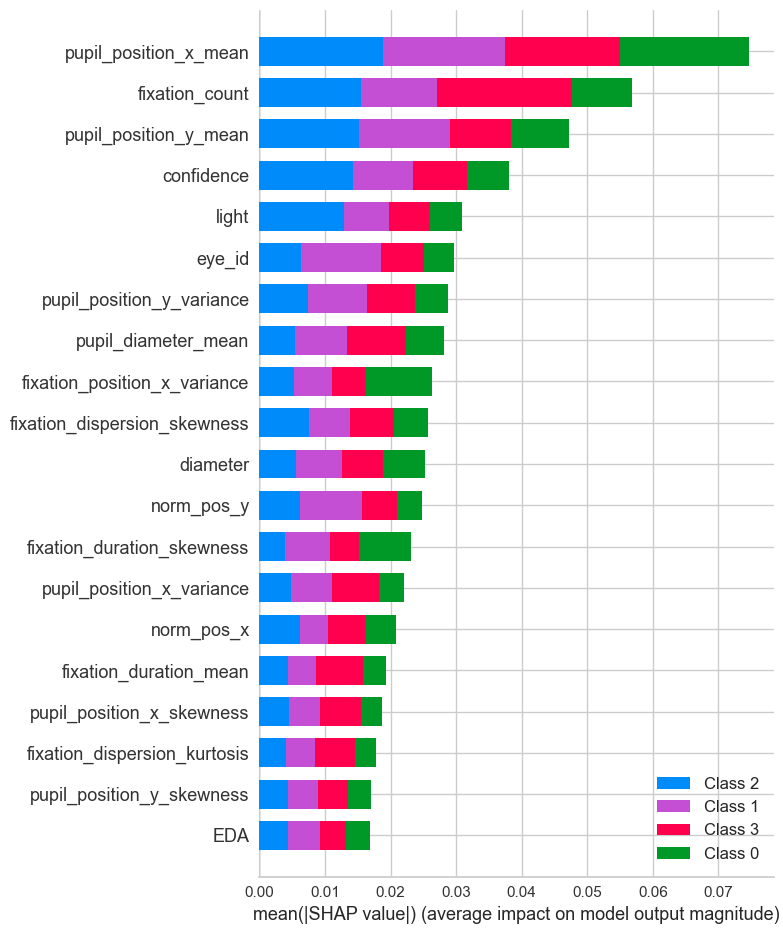

In [ ]:
interpret_model(best[0])

In [ ]:
interpret_model(best[0], plot='reason')

In [ ]:
dashboard(best[0])

### Perform Machine Learning (classification)
#### N = 2.5k

In [ ]:
from pycaret.classification import *

dataset = df.drop(['valence_rating', 'arousal_rating'], axis=1) #.sample(frac=0.1)
s = setup(data = dataset, target = 'categorised_rating')

,Description,Value
0,Session id,754
1,Target,categorised_rating
2,Target type,Multiclass
3,Original data shape,"(10000, 44)"
4,Transformed data shape,"(10000, 44)"
5,Transformed train set shape,"(7000, 44)"
6,Transformed test set shape,"(3000, 44)"
7,Numeric features,43
8,Rows with missing values,54.5%
9,Preprocess,True


In [17]:
best = compare_models(n_select=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:47:42
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5994,0.8299,0.5994,0.5993,0.5986,0.4659,0.4663,0.7810
et,Extra Trees Classifier,0.5556,0.8026,0.5556,0.5551,0.5549,0.4074,0.4077,0.0950
rf,Random Forest Classifier,0.5489,0.7930,0.5489,0.5485,0.5480,0.3985,0.3988,0.1850
dt,Decision Tree Classifier,0.4817,0.6545,0.4817,0.4824,0.4814,0.3090,0.3092,0.4580
gbc,Gradient Boosting Classifier,0.4733,0.7439,0.4733,0.4719,0.4716,0.2977,0.2982,4.8700
ada,Ada Boost Classifier,0.3707,0.6495,0.3707,0.3692,0.3685,0.1610,0.1614,0.2450
lda,Linear Discriminant Analysis,0.3449,0.6124,0.3449,0.3405,0.3402,0.1265,0.1271,0.0260
ridge,Ridge Classifier,0.3397,0.0000,0.3397,0.3348,0.3323,0.1196,0.1208,0.0210
lr,Logistic Regression,0.3140,0.5752,0.3140,0.3096,0.3056,0.0853,0.0865,0.6990
qda,Quadratic Discriminant Analysis,0.3046,0.6004,0.3046,0.3371,0.2467,0.0728,0.0920,0.0200


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

In [18]:
# print(best)

for b in best:
    print(b)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=754, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=754, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,

### Perform Machine Learning (classification)
#### N = 25k

In [15]:
from pycaret.classification import *

dataset = df.drop(['valence_rating', 'arousal_rating'], axis=1) #.sample(frac=0.1)
s = setup(data = dataset, target = 'categorised_rating')

,Description,Value
0,Session id,7813
1,Target,categorised_rating
2,Target type,Multiclass
3,Original data shape,"(100000, 44)"
4,Transformed data shape,"(100000, 44)"
5,Transformed train set shape,"(70000, 44)"
6,Transformed test set shape,"(30000, 44)"
7,Numeric features,43
8,Rows with missing values,55.3%
9,Preprocess,True


In [16]:
best = compare_models(n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9199,0.9878,0.9199,0.9197,0.9195,0.8931,0.8933,1.0170
rf,Random Forest Classifier,0.9189,0.9874,0.9189,0.9187,0.9185,0.8918,0.8920,2.0000
dt,Decision Tree Classifier,0.8630,0.9087,0.8630,0.8625,0.8626,0.8173,0.8174,0.8930
lightgbm,Light Gradient Boosting Machine,0.8321,0.9607,0.8321,0.8315,0.8312,0.7761,0.7765,1.7000
gbc,Gradient Boosting Classifier,0.5546,0.8014,0.5546,0.5532,0.5525,0.4061,0.4067,47.0000
ada,Ada Boost Classifier,0.3869,0.6646,0.3869,0.3854,0.3838,0.1826,0.1833,2.5070
knn,K Neighbors Classifier,0.3776,0.6398,0.3776,0.3829,0.3765,0.1702,0.1712,0.9840
lda,Linear Discriminant Analysis,0.3546,0.6183,0.3546,0.3516,0.3496,0.1394,0.1404,0.2000
ridge,Ridge Classifier,0.3488,0.0000,0.3488,0.3456,0.3418,0.1317,0.1332,0.0520
lr,Logistic Regression,0.3166,0.5819,0.3166,0.3150,0.3082,0.0888,0.0903,2.5470


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

In [17]:
# print(best)

for b in best:
    print(b)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7813, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7813, verbose=0, warm_start=False)
DecisionTreeClassif

### Perform Machine Learning (classification)
#### N = 250k

In [15]:
from pycaret.classification import *

dataset = df.drop(['valence_rating', 'arousal_rating'], axis=1) #.sample(frac=0.1)
s = setup(data = dataset, target = 'categorised_rating')

,Description,Value
0,Session id,5760
1,Target,categorised_rating
2,Target type,Multiclass
3,Original data shape,"(1000000, 44)"
4,Transformed data shape,"(1000000, 44)"
5,Transformed train set shape,"(700000, 44)"
6,Transformed test set shape,"(300000, 44)"
7,Numeric features,43
8,Rows with missing values,55.6%
9,Preprocess,True


In [16]:
best = compare_models(n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9992,1.0000,0.9992,0.9992,0.9992,0.9989,0.9989,27.7720
et,Extra Trees Classifier,0.9990,1.0000,0.9990,0.9990,0.9990,0.9987,0.9987,13.0790
dt,Decision Tree Classifier,0.9904,0.9936,0.9904,0.9904,0.9904,0.9873,0.9873,7.3450
lightgbm,Light Gradient Boosting Machine,0.8589,0.9708,0.8589,0.8588,0.8582,0.8119,0.8123,6.5170
knn,K Neighbors Classifier,0.6632,0.8685,0.6632,0.6634,0.6623,0.5509,0.5514,52.1400
gbc,Gradient Boosting Classifier,0.5640,0.8075,0.5640,0.5629,0.5619,0.4187,0.4195,649.5400
ada,Ada Boost Classifier,0.3921,0.6654,0.3921,0.3903,0.3888,0.1895,0.1902,32.0070
lda,Linear Discriminant Analysis,0.3498,0.6181,0.3498,0.3465,0.3444,0.1331,0.1341,1.0560
ridge,Ridge Classifier,0.3489,0.0000,0.3489,0.3455,0.3415,0.1318,0.1333,0.7400
lr,Logistic Regression,0.2844,0.5543,0.2844,0.2798,0.2392,0.0459,0.0488,45.4270


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

In [17]:
# print(best)

for b in best:
    print(b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5760, verbose=0, warm_start=False)
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5760, verbose=0, warm_start=False)
DecisionTreeClassif

### Perform Machine Learning (classification)
#### N = 2.5M

In [17]:
from pycaret.classification import *

dataset = df.drop(['valence_rating', 'arousal_rating'], axis=1) #.sample(frac=0.1)
s = setup(data = dataset, target = 'categorised_rating')

,Description,Value
0,Session id,5589
1,Target,categorised_rating
2,Target type,Multiclass
3,Original data shape,"(10000000, 44)"
4,Transformed data shape,"(10000000, 44)"
5,Transformed train set shape,"(7000000, 44)"
6,Transformed test set shape,"(3000000, 44)"
7,Numeric features,43
8,Rows with missing values,55.6%
9,Preprocess,True


In [18]:
best = compare_models(n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,361.5140
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,153.1570
dt,Decision Tree Classifier,0.9995,0.9997,0.9995,0.9995,0.9995,0.9993,0.9993,103.0020
knn,K Neighbors Classifier,0.9376,0.9906,0.9376,0.9378,0.9371,0.9168,0.9171,5083.7060
lightgbm,Light Gradient Boosting Machine,0.8639,0.9727,0.8639,0.8638,0.8632,0.8185,0.8189,49.4550
gbc,Gradient Boosting Classifier,0.5652,0.8082,0.5652,0.5644,0.5632,0.4203,0.4211,6950.1570
ada,Ada Boost Classifier,0.3891,0.6653,0.3891,0.3875,0.3867,0.1854,0.1859,361.5060
lda,Linear Discriminant Analysis,0.3488,0.6179,0.3488,0.3457,0.3435,0.1318,0.1327,11.6420
ridge,Ridge Classifier,0.3482,0.0000,0.3482,0.3451,0.3411,0.1309,0.1324,4.0330
qda,Quadratic Discriminant Analysis,0.2744,0.5817,0.2744,0.3292,0.1728,0.0326,0.0570,8.3660


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

In [20]:
# print(best)

for b in best:
    print(b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5589, verbose=0, warm_start=False)
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5589, verbose=0, warm_start=False)
DecisionTreeClassif

In [ ]:
evaluate_model(best[3])

In [ ]:
interpret_model(best[3])